In [ ]:
# visualize filters

In [47]:
import torch
from pathlib import Path
from autoencoder_classes import A64_6
import torchvision
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

In [3]:
model = A64_6().to(device='mps')
model_dir = Path('/Users/jarl/2d-discharge-nn/created_models/autoencoder/64x64/A64_6new/A64_6new')
model.load_state_dict(torch.load(model_dir))
model.eval()

A64_6(
  (encoder): Sequential(
    (0): Conv2d(5, 10, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
    (1): ReLU()
    (2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(20, 40, kernel_size=(1, 1), stride=(2, 2))
    (5): ReLU()
  )
  (decoder): Sequential(
    (0): ConvTranspose2d(40, 40, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
    (2): ConvTranspose2d(40, 20, kernel_size=(5, 5), stride=(2, 2))
    (3): ReLU()
    (4): Conv2d(20, 20, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): ConvTranspose2d(20, 10, kernel_size=(5, 5), stride=(2, 2))
    (7): ReLU()
    (8): Conv2d(10, 5, kernel_size=(1, 1), stride=(1, 1))
    (9): ReLU()
  )
)

In [4]:
model.encoder[:]

Sequential(
  (0): Conv2d(5, 10, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (1): ReLU()
  (2): Conv2d(10, 20, kernel_size=(3, 3), stride=(2, 2))
  (3): ReLU()
  (4): Conv2d(20, 40, kernel_size=(1, 1), stride=(2, 2))
  (5): ReLU()
)

In [38]:
model.encoder[0]

Conv2d(5, 10, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))

In [6]:
kernels = model.encoder[0].weight.detach().clone()

In [7]:
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()

In [27]:
kernels.shape

torch.Size([10, 5, 5, 5])

In [56]:
kernels.mean((1)).shape

torch.Size([10, 5, 5])

In [62]:
filter_img = torchvision.utils.make_grid(kernels.view(50, 5, 5), nrow=5)
avg_filter_img = torchvision.utils.make_grid(kernels.mean((1)), nrow=5)
filter_img.shape

torch.Size([50, 5, 5])

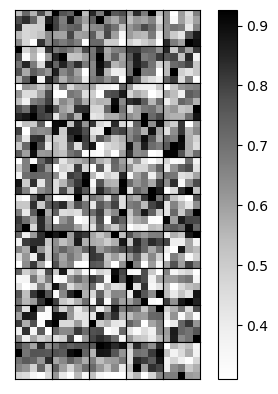

In [64]:
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(10, 5), axes_pad=0.0, label_mode="L", share_all=True,
                cbar_location="right", cbar_mode="single", cbar_size="5%", cbar_pad='5%')

for i, ax in enumerate(grid):
    im = ax.imshow(np.moveaxis(filter_img[i].cpu().numpy(), 0, -1), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

cb = grid.cbar_axes[0].colorbar(im)

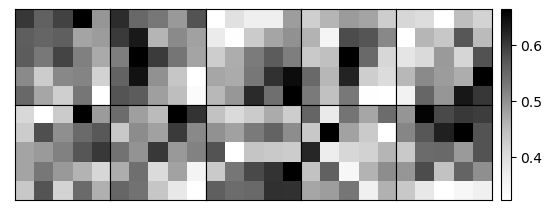

In [63]:
fig = plt.figure()
grid = ImageGrid(fig, 111, nrows_ncols=(2, 5), axes_pad=0.0, label_mode="L", share_all=True,
                cbar_location="right", cbar_mode="single", cbar_size="5%", cbar_pad='5%')

for i, ax in enumerate(grid):
    im = ax.imshow(np.moveaxis(avg_filter_img[i].cpu().numpy(), 0, -1), cmap='Greys')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

cb = grid.cbar_axes[0].colorbar(im)

In [69]:
nine = np.random.uniform(0, 1, (9, 9))
nine.shape

(9, 9)

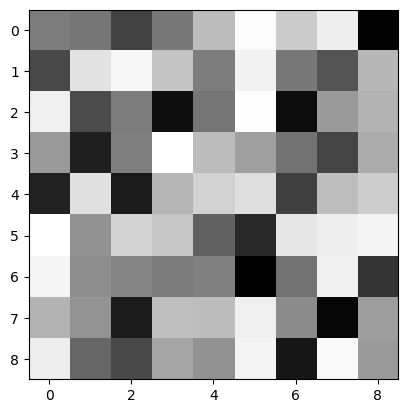

In [71]:
plt.imshow(nine, cmap='Greys')